In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
df = pd.read_csv('C:\\ESTERA\\CCT\\TWEETS\\sentiment.csv')
df.head()

,Date,Time,User,SentimentScore
0,2009-04-06,23:11:56,sambg7777,0.2235
1,2009-04-06,23:23:55,fieldsbooks,0.3182
2,2009-04-06,23:43:49,_gnosis,0.5399
3,2009-04-06,22:43:05,REV3AL,0.0000
4,2009-04-06,23:53:37,nabejero,0.6249


# EDA

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Date            1600000 non-null  object 
 1   Time            1600000 non-null  object 
 2   User            1600000 non-null  object 
 3   SentimentScore  1600000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 48.8+ MB


In [78]:
df.head()

,Date,Time,User,SentimentScore
0,2009-04-06,23:11:56,sambg7777,0.2235
1,2009-04-06,23:23:55,fieldsbooks,0.3182
2,2009-04-06,23:43:49,_gnosis,0.5399
3,2009-04-06,22:43:05,REV3AL,0.0000
4,2009-04-06,23:53:37,nabejero,0.6249


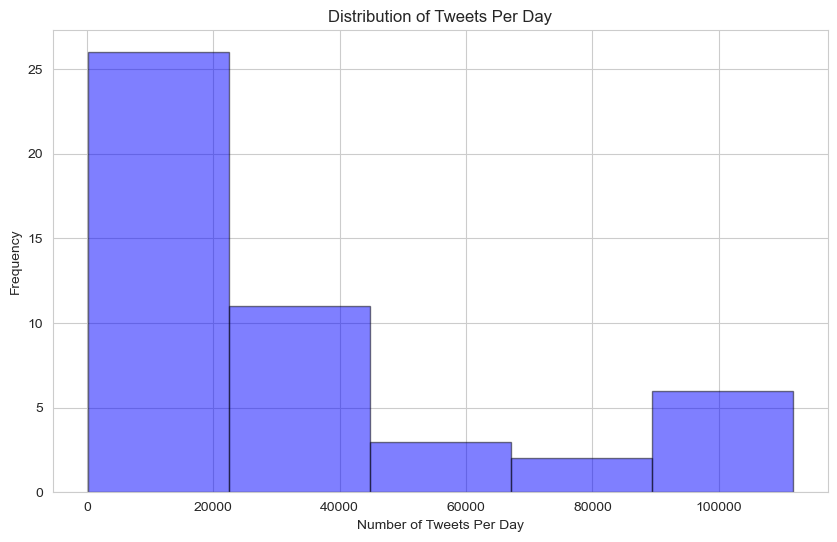

In [79]:
# counting the number of tweets per day
tweets_per_day = df['Date'].value_counts().sort_index()

# creating a histogram for the distribution of tweets per day
plt.figure(figsize=(10, 6))
plt.hist(tweets_per_day, bins=5, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Number of Tweets Per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Tweets Per Day')
plt.show()

In [80]:
# converting the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# extracting the date component and store it in a new column 'DateOnly'
df['DateOnly'] = df['Date'].dt.date

# finding the oldest date
oldest_date = df['DateOnly'].min()

# finding the newest date
newest_date = df['DateOnly'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 2009-04-06
Newest Date: 2009-06-25


In [81]:
# calculating the number of days between the oldest and newest dates
days_between = (newest_date - oldest_date).days

print("Number of days between the oldest and newest date:", days_between)

Number of days between the oldest and newest date: 80


In [82]:
# finding the highest sentiment score
highest_sentiment = df['SentimentScore'].max()

# finding the lowest sentiment score
lowest_sentiment = df['SentimentScore'].min()

print("Highest Sentiment Score:", highest_sentiment)
print("Lowest Sentiment Score:", lowest_sentiment)

Highest Sentiment Score: 0.9987
Lowest Sentiment Score: -0.9985


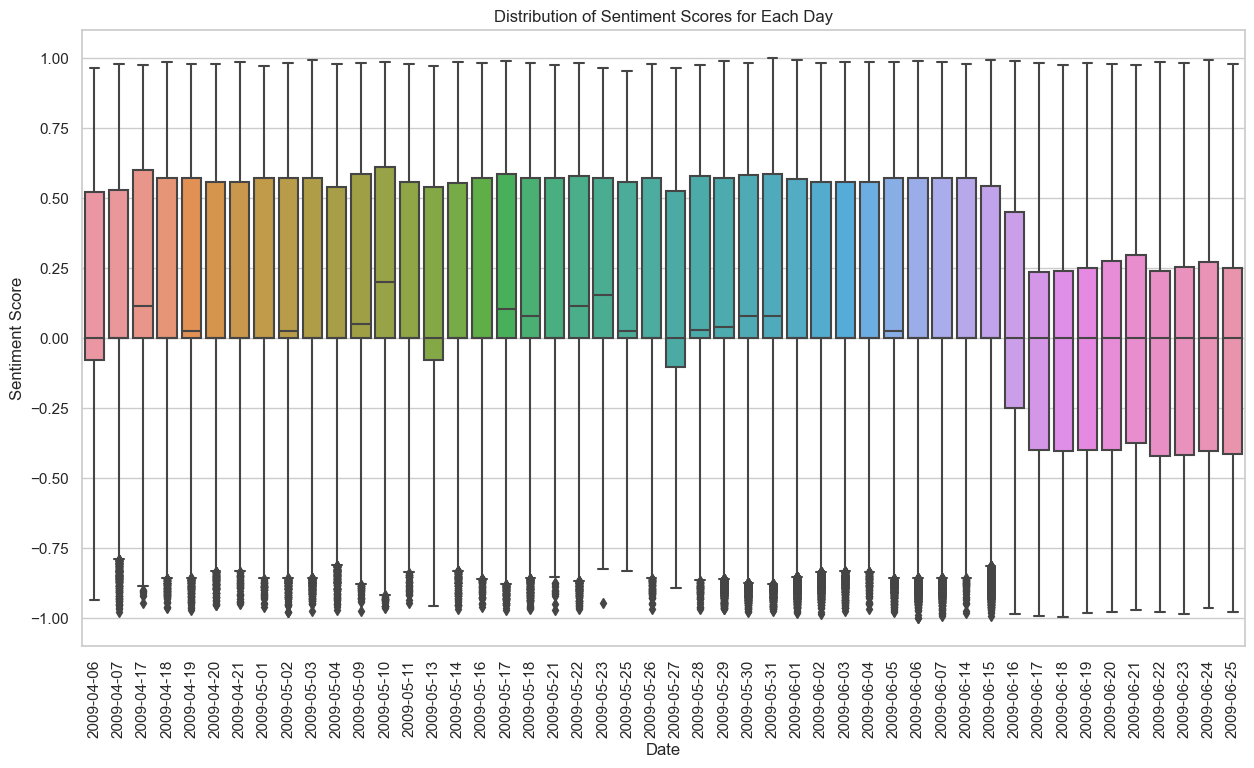

In [83]:
# setting the figure size for the plot
plt.figure(figsize=(15, 8))

# creating the grouped box plot
sns.set(style="whitegrid")
sns.boxplot(data=df, x=df['Date'].dt.date, y='SentimentScore')

# rotating x-axis labels for better readability
plt.xticks(rotation=90)

# setting labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores for Each Day')

# showing the plot
plt.show()

In [84]:
# counting the number of rows with sentiment scores lower than -0.7
count = (df['SentimentScore'] < -0.7).sum()

# calculating the total number of rows in the DataFrame
total_rows = len(df)

# calculating the percentage
percentage = (count / total_rows) * 100

print("Number of rows with sentiment scores lower than -0.7:", count, "which is: {:.2f}%".format(percentage), 'of entire data.')

Number of rows with sentiment scores lower than -0.7: 56092 which is: 3.51% of entire data.


### Checking how many tweets per day there was before sentiment dropped

In [85]:
# defining the split date
split_date = pd.to_datetime('2009-06-16')

# counting the number of tweets for each day before and after the split date
tweets_before = len(df[(df['Date'] < split_date)])
tweets_after = len(df[(df['Date'] >= split_date)])

# calculating the number of days before and after the split date
days_before = (split_date - df['Date'].min()).days
days_after = (df['Date'].max() - split_date).days

# calculating the average number of tweets per day before and after the split date
average_tweets_before = tweets_before / days_before
average_tweets_after = tweets_after / days_after

# printing the results
print("Average Number of Tweets Per Day Before", split_date, ":", average_tweets_before)
print("Average Number of Tweets Per Day After", split_date, ":", average_tweets_after)

Average Number of Tweets Per Day Before 2009-06-16 00:00:00 : 18100.563380281692
Average Number of Tweets Per Day After 2009-06-16 00:00:00 : 34984.444444444445


C:\Users\ester\AppData\Local\Temp\ipykernel_15772\2950985654.py:8: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  colors = ['skyblue' if date < pd.to_datetime('2009-06-17') else 'lightcoral' for date in tweets_per_day.index]


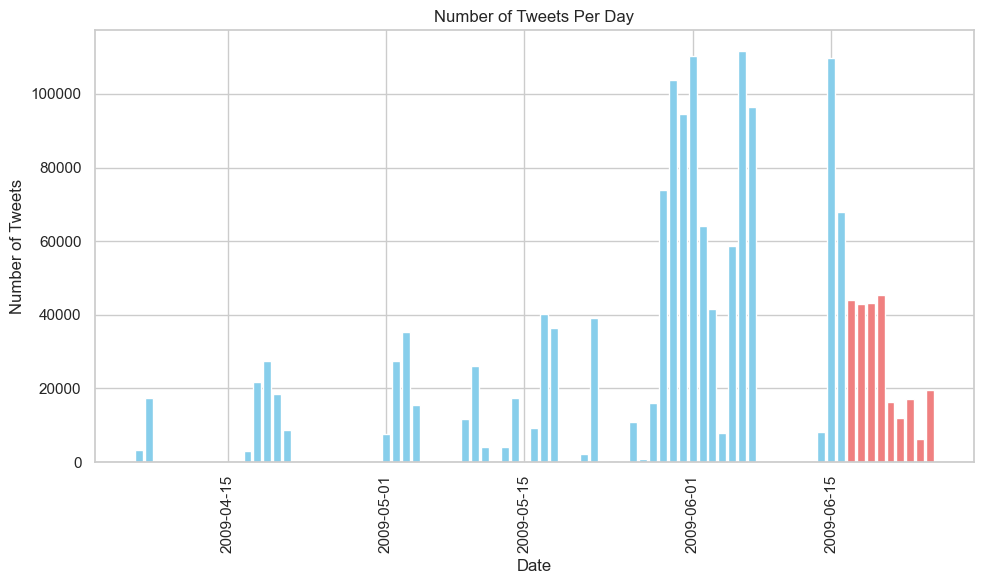

In [86]:
# couting the number of tweets per day
tweets_per_day = df['Date'].dt.date.value_counts().sort_index()

# plotting the number of tweets per day
plt.figure(figsize=(10, 6))

# defining a color map
colors = ['skyblue' if date < pd.to_datetime('2009-06-17') else 'lightcoral' for date in tweets_per_day.index]

# plotting the bars with different colors for dates before and after '2009-06-17'
plt.bar(tweets_per_day.index, tweets_per_day, color=colors)

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Per Day')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Average Sentiment

In [87]:
# groupping the data by date and calculate the average sentiment score for each day
daily_average_sentiment = df.groupby(df['Date'].dt.date)['SentimentScore'].mean()

# resetting the index to make the result a DataFrame
daily_average_sentiment = daily_average_sentiment.reset_index()

# renaming the columns
daily_average_sentiment.columns = ['Date', 'AverageSentimentScore']

# printing the result
print(daily_average_sentiment)

          Date  AverageSentimentScore
0   2009-04-06               0.140827
1   2009-04-07               0.160714
2   2009-04-17               0.196156
3   2009-04-18               0.179587
4   2009-04-19               0.183181
5   2009-04-20               0.171664
6   2009-04-21               0.173760
7   2009-05-01               0.175291
8   2009-05-02               0.179137
9   2009-05-03               0.171463
10  2009-05-04               0.162268
11  2009-05-09               0.180800
12  2009-05-10               0.211616
13  2009-05-11               0.163905
14  2009-05-13               0.141473
15  2009-05-14               0.165709
16  2009-05-16               0.172566
17  2009-05-17               0.199657
18  2009-05-18               0.186547
19  2009-05-21               0.175465
20  2009-05-22               0.195657
21  2009-05-23               0.186884
22  2009-05-25               0.178679
23  2009-05-26               0.168745
24  2009-05-27               0.125796
25  2009-05-

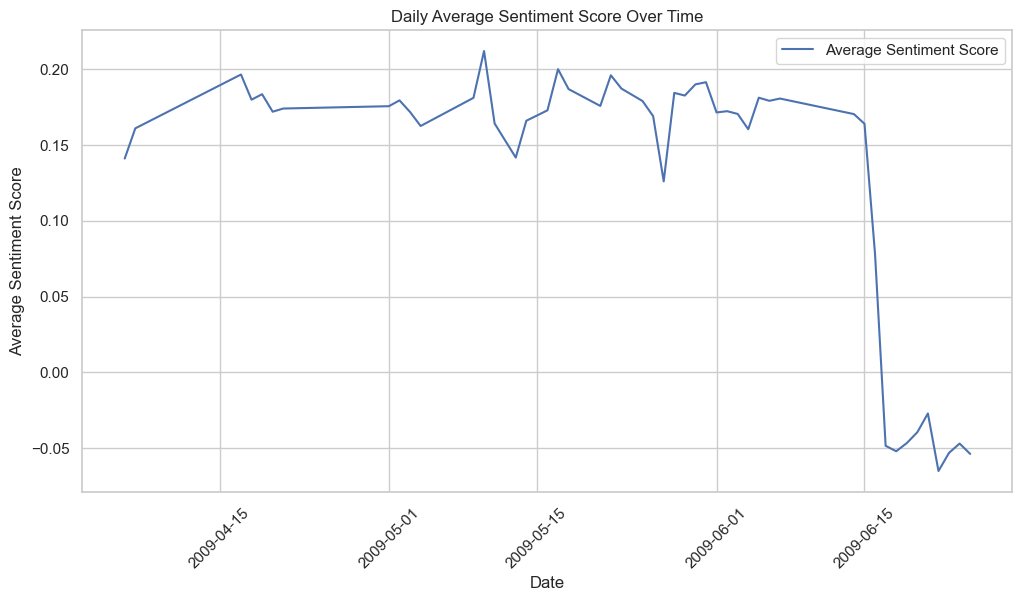

In [88]:
# creating a time series plot to visualize the daily sentiment trends
plt.figure(figsize=(12, 6))
plt.plot(daily_average_sentiment['Date'], daily_average_sentiment['AverageSentimentScore'], label='Average Sentiment Score', color='b')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Daily Average Sentiment Score Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [89]:
# calculating the average sentiment
average_sentiment = daily_average_sentiment['AverageSentimentScore'].mean()

# rounding it to two decimal places
average_sentiment_rounded = round(average_sentiment, 2)

# printing the result
print(f"The average sentiment is: {average_sentiment_rounded}")

The average sentiment is: 0.13


# Checking tweets content for context of the data

In [49]:
import pandas as pd
csv_file_path = "C:\\ESTERA\\CCT\\TWEETS\\ProjectTweets.csv"
column_names =['Id','Tweet_id','Date','No_Querry','User','Tweet']

data_2 = pd.read_csv(csv_file_path, names=column_names)
data_2.columns = column_names

In [46]:
data_2.head()

,Id,Tweet_id,Date,No_Querry,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [44]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Id         1600000 non-null  int64 
 1   Tweet_id   1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   No_Querry  1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
 6   Time       1600000 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [50]:
# removing the 'PDT' part from the 'Date' column
data_2['Date'] = data_2['Date'].str.replace(' PDT', '')

# converting the 'Date' column to a datetime format
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%a %b %d %H:%M:%S %Y')

# extracting the 'Time' component while preserving the original date format
data_2['Time'] = data_2['Date'].dt.strftime('%H:%M:%S')

# extracting the 'Date' component in the 'YYYY-MM-DD' format
data_2['Date'] = data_2['Date'].dt.strftime('%Y-%m-%d')


In [51]:
data_2.head()

,Id,Tweet_id,Date,No_Querry,User,Tweet,Time
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",22:19:45
1,1,1467810672,2009-04-06,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,22:19:49
2,2,1467810917,2009-04-06,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,22:19:53
3,3,1467811184,2009-04-06,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,22:19:57
4,4,1467811193,2009-04-06,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",22:19:57


### preprocessing data before pulling context

In [52]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ester\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# appling the preprocessing function to the 'Tweet' column
data_2['Tweet'] = data_2['Tweet'].apply(preprocess_text)
data_2.head()

,Id,Tweet_id,Date,No_Querry,User,Tweet,Time
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,switchfoot http awww bummer shoulda got david ...,22:19:45
1,1,1467810672,2009-04-06,NO_QUERY,scotthamilton,upset ca update facebook texting might cry res...,22:19:49
2,2,1467810917,2009-04-06,NO_QUERY,mattycus,kenichan dived many times ball managed save re...,22:19:53
3,3,1467811184,2009-04-06,NO_QUERY,ElleCTF,whole body feels itchy like fire,22:19:57
4,4,1467811193,2009-04-06,NO_QUERY,Karoli,nationwideclass behaving mad ca see,22:19:57


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# creating a Document-Term Matrix (DTM)
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(data_2['Tweet'])

# appling LDA
num_topics = 5 
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

#### Inspecting topics

In [57]:
# getting the top 10 words for each topic
num_top_words = 10  
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: love, lol, thanks, fun, good, night, come, lt, yes, way
Topic 2: going, know, home, today, right, time, oh, sick, want, let
Topic 3: http, na, miss, twitter, sorry, sad, gon, really, people, wan
Topic 4: day, work, good, morning, tomorrow, ca, today, sleep, happy, school
Topic 5: like, quot, got, yeah, feel, new, soon, better, make, cool


###
Topic 1: Positive Emotions <br>
Topic 2: Daily Life and Activities<br>
Topic 3: Online Interaction and Communication <br>
Topic 4: Daily Routine and Well-being <br>
Topic 5: Expressing Thoughts and Opinions

In [62]:
# assigning topics to documents
topic_distribution = lda.transform(dtm)

# adding 1 to topic labels to make them start from 1
data_2['Topic'] = (topic_distribution.argmax(axis=1) + 1)

In [63]:
data_2.head(10)

,Id,Tweet_id,Date,No_Querry,User,Tweet,Time,Topic
0,0,1467810369,2009-04-06,NO_QUERY,_TheSpecialOne_,switchfoot http awww bummer shoulda got david ...,22:19:45,3
1,1,1467810672,2009-04-06,NO_QUERY,scotthamilton,upset ca update facebook texting might cry res...,22:19:49,4
2,2,1467810917,2009-04-06,NO_QUERY,mattycus,kenichan dived many times ball managed save re...,22:19:53,5
3,3,1467811184,2009-04-06,NO_QUERY,ElleCTF,whole body feels itchy like fire,22:19:57,5
4,4,1467811193,2009-04-06,NO_QUERY,Karoli,nationwideclass behaving mad ca see,22:19:57,4
5,5,1467811372,2009-04-06,NO_QUERY,joy_wolf,kwesidei whole crew,22:20:00,1
6,6,1467811592,2009-04-06,NO_QUERY,mybirch,need hug,22:20:03,4
7,7,1467811594,2009-04-06,NO_QUERY,coZZ,loltrish hey long time see yes rains bit bit l...,22:20:03,1
8,8,1467811795,2009-04-06,NO_QUERY,2Hood4Hollywood,nope,22:20:05,5
9,9,1467812025,2009-04-06,NO_QUERY,mimismo,twittera que muera,22:20:09,1


<Figure size 1200x600 with 0 Axes>

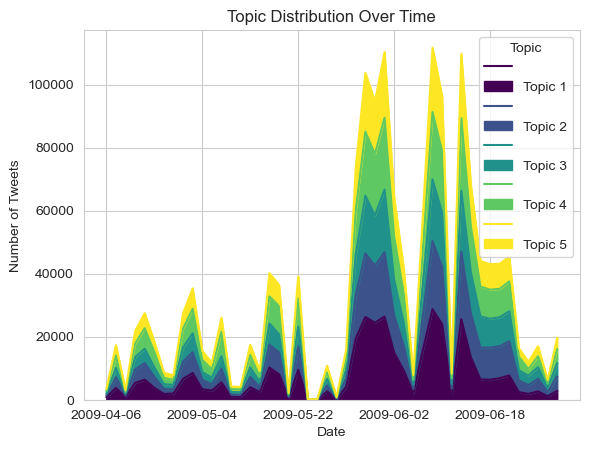

In [71]:
# groupping by 'Date' and 'Topic', and count the number of occurrences
topic_counts = data_2.groupby(['Date', 'Topic']).size().unstack(fill_value=0)

# creating a stacked area plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
topic_counts.plot(kind='area', stacked=True, colormap='viridis')
plt.title("Topic Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title='Topic', loc='upper right', labels=['', 'Topic 1', '', 'Topic 2', '', 'Topic 3','','Topic 4','','Topic 5'])
plt.show()

# Sentiment Forecasting

### 1. Analizing missing data


In [98]:
print(daily_average_sentiment)

          Date  AverageSentimentScore
0   2009-04-06               0.140827
1   2009-04-07               0.160714
2   2009-04-17               0.196156
3   2009-04-18               0.179587
4   2009-04-19               0.183181
5   2009-04-20               0.171664
6   2009-04-21               0.173760
7   2009-05-01               0.175291
8   2009-05-02               0.179137
9   2009-05-03               0.171463
10  2009-05-04               0.162268
11  2009-05-09               0.180800
12  2009-05-10               0.211616
13  2009-05-11               0.163905
14  2009-05-13               0.141473
15  2009-05-14               0.165709
16  2009-05-16               0.172566
17  2009-05-17               0.199657
18  2009-05-18               0.186547
19  2009-05-21               0.175465
20  2009-05-22               0.195657
21  2009-05-23               0.186884
22  2009-05-25               0.178679
23  2009-05-26               0.168745
24  2009-05-27               0.125796
25  2009-05-

In [186]:
# converting the 'Date' column to datetime
daily_average_sentiment['Date'] = pd.to_datetime(daily_average_sentiment['Date'])

# finding the minimum and maximum dates in DataFrame
min_date = daily_average_sentiment['Date'].min()
max_date = daily_average_sentiment['Date'].max()

# creating a date range covering the entire range
date_range = pd.date_range(start=min_date, end=max_date)

# creating a new DataFrame with the date range
date_range_df = pd.DataFrame({'Date': date_range})

# merging the date range DataFrame with 'daily_average_sentiment' DataFrame, filling missing dates
merged_data = date_range_df.merge(daily_average_sentiment, on='Date', how='left')

# setting 'AverageSentimentScore' to NaN for missing dates
merged_data['AverageSentimentScore'].fillna(float('nan'), inplace=True)

# sortting the merged DataFrame by date
merged_data.sort_values('Date', inplace=True)

# reseting the index
merged_data.reset_index(drop=True, inplace=True)
merged_data.head()

,Date,AverageSentimentScore
0,2009-04-06,0.140827
1,2009-04-07,0.160714
2,2009-04-08,NaN
3,2009-04-09,NaN
4,2009-04-10,NaN


In [187]:
merged_data.head(40)

,Date,AverageSentimentScore
0,2009-04-06,0.140827
1,2009-04-07,0.160714
2,2009-04-08,NaN
3,2009-04-09,NaN
4,2009-04-10,NaN
5,2009-04-11,NaN
6,2009-04-12,NaN
7,2009-04-13,NaN
8,2009-04-14,NaN
9,2009-04-15,NaN


In [188]:
missing_data = pd.DataFrame(merged_data)

# setting 'Date' as the index
missing_data.set_index('Date', inplace=True)

# date to check before and after
date_to_check = '2009-05-09'

# counting NaN values before and after the date
nan_before = missing_data.loc[:date_to_check, 'AverageSentimentScore'].isna().sum()
nan_after = missing_data.loc[date_to_check:, 'AverageSentimentScore'].isna().sum()

print("Number of NaN values before", date_to_check, ":", nan_before)
print("Number of NaN values after", date_to_check, ":", nan_after)

Number of NaN values before 2009-05-09 : 22
Number of NaN values after 2009-05-09 : 11


### 2. Handling missing data
Data will be temporary tuncated as majority of missing data points are located at very begining of data set.

#### a) filling missing values

In [121]:
# selecting only rows after '2009-05-09'
rows = missing_data.loc['2009-05-09':]
print(rows)

            AverageSentimentScore
Date                             
2009-05-09               0.180800
2009-05-10               0.211616
2009-05-11               0.163905
2009-05-12                    NaN
2009-05-13               0.141473
2009-05-14               0.165709
2009-05-15                    NaN
2009-05-16               0.172566
2009-05-17               0.199657
2009-05-18               0.186547
2009-05-19                    NaN
2009-05-20                    NaN
2009-05-21               0.175465
2009-05-22               0.195657
2009-05-23               0.186884
2009-05-24                    NaN
2009-05-25               0.178679
2009-05-26               0.168745
2009-05-27               0.125796
2009-05-28               0.184043
2009-05-29               0.182305
2009-05-30               0.189658
2009-05-31               0.191091
2009-06-01               0.171169
2009-06-02               0.172011
2009-06-03               0.170204
2009-06-04               0.160126
2009-06-05    

In [122]:
# filling missing values using linear interpolation
rows['AverageSentimentScore'].interpolate(method='linear', inplace=True)

C:\Users\ester\AppData\Local\Temp\ipykernel_15772\1346891747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['AverageSentimentScore'].interpolate(method='linear', inplace=True)


In [123]:
print(rows)

            AverageSentimentScore
Date                             
2009-05-09               0.180800
2009-05-10               0.211616
2009-05-11               0.163905
2009-05-12               0.152689
2009-05-13               0.141473
2009-05-14               0.165709
2009-05-15               0.169137
2009-05-16               0.172566
2009-05-17               0.199657
2009-05-18               0.186547
2009-05-19               0.182853
2009-05-20               0.179159
2009-05-21               0.175465
2009-05-22               0.195657
2009-05-23               0.186884
2009-05-24               0.182782
2009-05-25               0.178679
2009-05-26               0.168745
2009-05-27               0.125796
2009-05-28               0.184043
2009-05-29               0.182305
2009-05-30               0.189658
2009-05-31               0.191091
2009-06-01               0.171169
2009-06-02               0.172011
2009-06-03               0.170204
2009-06-04               0.160126
2009-06-05    

#### b) checking trend, seasonality and randomness

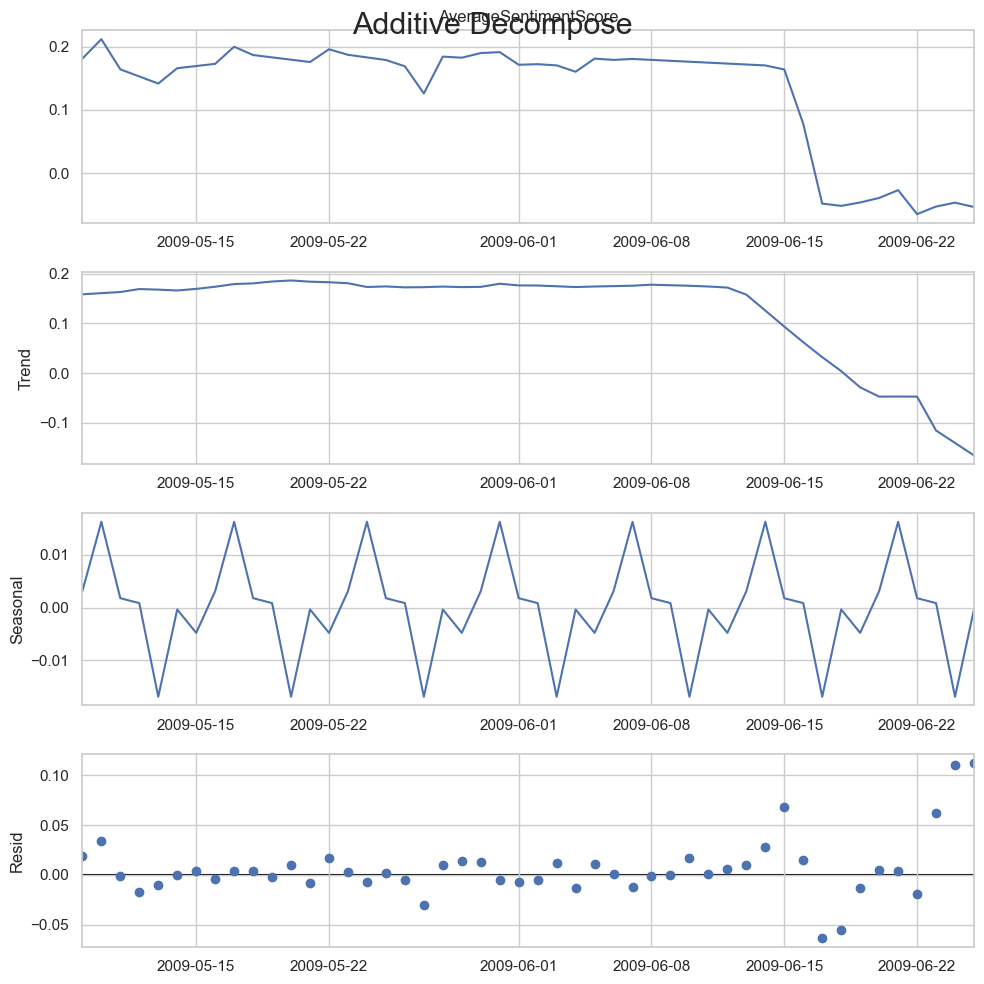

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
%matplotlib inline

# Additive Decomposition
result_add = seasonal_decompose(rows['AverageSentimentScore'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [128]:
# Extract the Components 
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2009-05-09,0.003120,0.158760,0.018919,0.180800
2009-05-10,0.016295,0.161056,0.034265,0.211616
2009-05-11,0.001788,0.163352,-0.001235,0.163905
2009-05-12,0.000856,0.169333,-0.017500,0.152689
2009-05-13,-0.016921,0.168157,-0.009763,0.141473


In [136]:
print(df_reconstructed)

                seas     trend     resid  actual_values
Date                                                   
2009-05-09  0.003120  0.158760  0.018919       0.180800
2009-05-10  0.016295  0.161056  0.034265       0.211616
2009-05-11  0.001788  0.163352 -0.001235       0.163905
2009-05-12  0.000856  0.169333 -0.017500       0.152689
2009-05-13 -0.016921  0.168157 -0.009763       0.141473
2009-05-14 -0.000350  0.166448 -0.000389       0.165709
2009-05-15 -0.004789  0.169683  0.004244       0.169137
2009-05-16  0.003120  0.173992 -0.004546       0.172566
2009-05-17  0.016295  0.179376  0.003987       0.199657
2009-05-18  0.001788  0.180769  0.003990       0.186547
2009-05-19  0.000856  0.184558 -0.002561       0.182853
2009-05-20 -0.016921  0.186603  0.009477       0.179159
2009-05-21 -0.000350  0.184193 -0.008377       0.175465
2009-05-22 -0.004789  0.183069  0.017377       0.195657
2009-05-23  0.003120  0.181053  0.002711       0.186884
2009-05-24  0.016295  0.173430 -0.006943       0

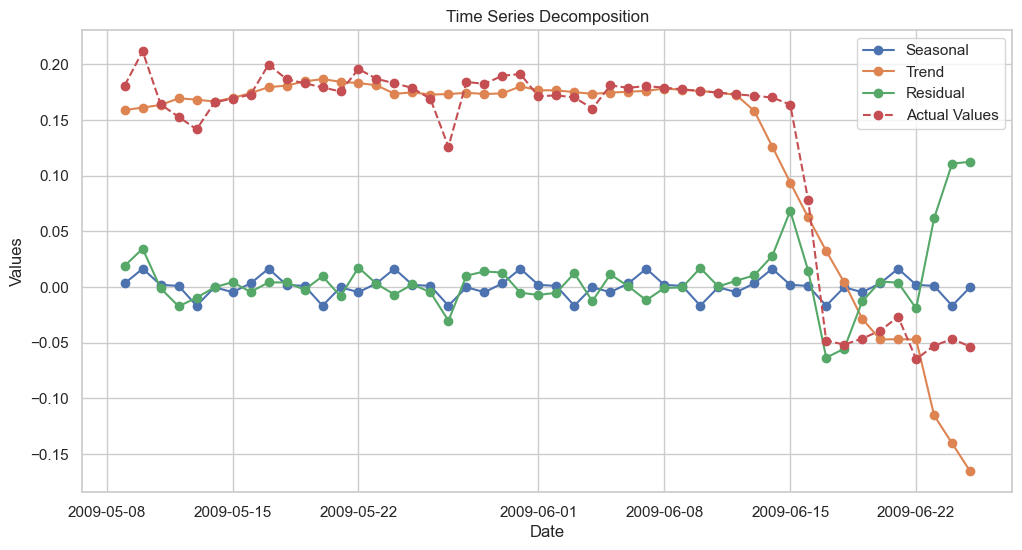

In [132]:
# creating a figure and plot
plt.figure(figsize=(12, 6))
plt.plot(df_reconstructed.index, df_reconstructed['seas'], label='Seasonal', marker='o')
plt.plot(df_reconstructed.index, df_reconstructed['trend'], label='Trend', marker='o')
plt.plot(df_reconstructed.index, df_reconstructed['resid'], label='Residual', marker='o')
plt.plot(df_reconstructed.index, df_reconstructed['actual_values'], label='Actual Values', marker='o', linestyle='--')

# customizing the plot
plt.title('Time Series Decomposition')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# showing the plot
plt.show()

#### c) checking if data is stationary or not

In [134]:
from statsmodels.tsa.stattools import adfuller

# extractting the time series from DataFrame
time_series = rows['AverageSentimentScore']

# performing the ADF test
result = adfuller(time_series)

# extracting and print the results
adf_statistic, p_value, used_lag, nobs, critical_values, icbest = result

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Used Lag:", used_lag)
print("Number of Observations:", nobs)
print("Critical Values:", critical_values)
print("IC Best:", icbest)

# interpreting the results
if p_value <= 0.05:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is not stationary.")

ADF Statistic: -0.5840941316139622
p-value: 0.8745357489266903
Used Lag: 1
Number of Observations: 46
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
IC Best: -153.90845784110707
Fail to reject the null hypothesis: The data is not stationary.


#### d) Reverse filling missing data & applying known informations to entire data set

In [259]:
merged_data.head(20)

,Date,AverageSentimentScore
0,2009-04-06,0.140827
1,2009-04-07,0.160714
2,2009-04-08,NaN
3,2009-04-09,NaN
4,2009-04-10,NaN
5,2009-04-11,NaN
6,2009-04-12,NaN
7,2009-04-13,NaN
8,2009-04-14,NaN
9,2009-04-15,NaN


In [260]:
# creating a copy of the 'merged_data' DataFrame
#reversed_df = merged_data.copy()

# reversing the order of the DataFrame
#reversed_df = reversed_df.iloc[::-1].reset_index(drop=True)
#reversed_df.head()

,Date,AverageSentimentScore
0,2009-06-25,-0.053605
1,2009-06-24,-0.046778
2,2009-06-23,-0.052896
3,2009-06-22,-0.064863
4,2009-06-21,-0.026963


In [261]:
reversed_df.tail(20)

,Date,AverageSentimentScore
61,2009-04-25,NaN
62,2009-04-24,NaN
63,2009-04-23,NaN
64,2009-04-22,NaN
65,2009-04-21,0.173760
66,2009-04-20,0.171664
67,2009-04-19,0.183181
68,2009-04-18,0.179587
69,2009-04-17,0.196156
70,2009-04-16,NaN


In [206]:
#end_date = pd.to_datetime("2009-06-08")

# slicing the df_reconstructed DataFrame to include only rows until the specified end_date
#composition = df_reconstructed.loc[:end_date].copy()


# reversing the order of the DataFrame
#composition = composition.iloc[::-1].reset_index(drop=False)
#composition.head()

,Date,seas,trend,resid,actual_values
0,2009-06-08,0.001788,0.178109,-0.001025,0.178872
1,2009-06-07,0.016295,0.176058,-0.012019,0.180334
2,2009-06-06,0.003120,0.175237,0.000482,0.178839
3,2009-06-05,-0.004789,0.174466,0.011200,0.180876
4,2009-06-04,-0.000350,0.173366,-0.012890,0.160126


In [200]:
print(composition)

         Date      seas     trend     resid  actual_values
0  2009-06-08  0.001788  0.178109 -0.001025       0.178872
1  2009-06-07  0.016295  0.176058 -0.012019       0.180334
2  2009-06-06  0.003120  0.175237  0.000482       0.178839
3  2009-06-05 -0.004789  0.174466  0.011200       0.180876
4  2009-06-04 -0.000350  0.173366 -0.012890       0.160126
5  2009-06-03 -0.016921  0.174902  0.012222       0.170204
6  2009-06-02  0.000856  0.176448 -0.005293       0.172011
7  2009-06-01  0.001788  0.176652 -0.007271       0.171169
8  2009-05-31  0.016295  0.180069 -0.005273       0.191091
9  2009-05-30  0.003120  0.173725  0.012813       0.189658
10 2009-05-29 -0.004789  0.173258  0.013836       0.182305
11 2009-05-28 -0.000350  0.174331  0.010062       0.184043
12 2009-05-27 -0.016921  0.173144 -0.030427       0.125796
13 2009-05-26  0.000856  0.172748 -0.004859       0.168745
14 2009-05-25  0.001788  0.174655  0.002236       0.178679
15 2009-05-24  0.016295  0.173430 -0.006943       0.1827

In [201]:
# finding the index where missing values start in reversed_df
missing_start_idx = reversed_df[reversed_df['AverageSentimentScore'].isna()].index[0]

# linear interpolation for available values in reversed_df
reversed_df['AverageSentimentScore'] = reversed_df['AverageSentimentScore'].interpolate(method='linear')

# iterating over the remaining missing values and backcast them based on composition
for idx in range(missing_start_idx, len(reversed_df)):
    
    # calculating the corresponding date for the reversed_df index
    date = reversed_df.index[idx]
    
    # finding the corresponding row in the composition DataFrame
    composition_row = composition[composition['Date'] == date]
    
    # checking if a corresponding row was found
    if not composition_row.empty:
        
        # using the trend and resid values to estimate the missing value
        estimated_value = composition_row['trend'].values[0] + composition_row['resid'].values[0]
        
        # filling in the missing value in reversed_df
        reversed_df.at[date, 'AverageSentimentScore'] = estimated_value

# filling the remaining missing values with NaN (if any)
reversed_df['AverageSentimentScore'].fillna(np.nan, inplace=True)

In [207]:
reversed_df

,Date,AverageSentimentScore
0,2009-06-25,-0.053605
1,2009-06-24,-0.046778
2,2009-06-23,-0.052896
3,2009-06-22,-0.064863
4,2009-06-21,-0.026963
...,...,...
76,2009-04-10,NaN
77,2009-04-09,NaN
78,2009-04-08,NaN
79,2009-04-07,0.160714


In [208]:
# finding the index where missing values start in reversed_df
#missing_start_idx = reversed_df[reversed_df['AverageSentimentScore'].isna()].index[0]

# linear interpolation for available values in reversed_df
#reversed_df['AverageSentimentScore'] = reversed_df['AverageSentimentScore'].interpolate(method='linear')

# iterating over the remaining missing values and backcast them based on composition
#for idx in range(missing_start_idx, len(reversed_df)):
    # calculating the corresponding date for the reversed_df index
#    date = reversed_df.index[idx]
    
    # finding the corresponding row in the composition DataFrame
#    composition_row = composition[composition['Date'] == date]
    
    # checking if a corresponding row was found
#    if not composition_row.empty:
        # using the trend, season, and resid values to estimate the missing value
#        estimated_value = (
#            composition_row['trend'].values[0] +
#            composition_row['seas'].values[0] +
#            composition_row['resid'].values[0]
#        )
        
        # filling in the missing value in reversed_df
#        reversed_df.at[date, 'AverageSentimentScore'] = estimated_value

## filling the remaining missing values with NaN (if any)
#reversed_df['AverageSentimentScore'].fillna(np.nan, inplace=True)

In [209]:
#reversed_df.tail(20)

,Date,AverageSentimentScore
61,2009-04-25,0.174373
62,2009-04-24,0.174219
63,2009-04-23,0.174066
64,2009-04-22,0.173913
65,2009-04-21,0.173760
66,2009-04-20,0.171664
67,2009-04-19,0.183181
68,2009-04-18,0.179587
69,2009-04-17,0.196156
70,2009-04-16,0.192612


In [232]:
#full_df = reversed_df.iloc[::-1]
#full_df.head()

,Date,AverageSentimentScore
80,2009-04-06,0.140827
79,2009-04-07,0.160714
78,2009-04-08,0.164258
77,2009-04-09,0.167803
76,2009-04-10,0.171347


In [233]:
#full_df.reset_index(drop=True, inplace=True)
#full_df.head()

,Date,AverageSentimentScore
0,2009-04-06,0.140827
1,2009-04-07,0.160714
2,2009-04-08,0.164258
3,2009-04-09,0.167803
4,2009-04-10,0.171347


In [234]:
# converting the 'Date' column to a datetime data type
#full_df['Date'] = pd.to_datetime(full_df['Date'])

# setting the 'Date' column as the index
#full_df.set_index('Date', inplace=True)

# verifing the changes
#print(full_df.head())

            AverageSentimentScore
Date                             
2009-04-06               0.140827
2009-04-07               0.160714
2009-04-08               0.164258
2009-04-09               0.167803
2009-04-10               0.171347


### Stationarity check

In [263]:
# linear interpolation for available values in reversed_df
merged_data['AverageSentimentScore'] = merged_data['AverageSentimentScore'].interpolate(method='linear')

In [264]:
merged_data.head()

,Date,AverageSentimentScore
0,2009-04-06,0.140827
1,2009-04-07,0.160714
2,2009-04-08,0.164258
3,2009-04-09,0.167803
4,2009-04-10,0.171347


In [265]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(merged_data['AverageSentimentScore'])

#stationarity
print('Dickey Fuller p-value: %F' % stationarity[1])

Dickey Fuller p-value: 0.909770


In [266]:
# calculating the second differenced series
merged_data['Differenced_Sentiment'] = merged_data['AverageSentimentScore'].diff()

# backfilling NaN values with zero
merged_data['Differenced_Sentiment'].fillna(0, inplace=True)
print(merged_data) 

         Date  AverageSentimentScore  Differenced_Sentiment
0  2009-04-06               0.140827               0.000000
1  2009-04-07               0.160714               0.019887
2  2009-04-08               0.164258               0.003544
3  2009-04-09               0.167803               0.003544
4  2009-04-10               0.171347               0.003544
..        ...                    ...                    ...
76 2009-06-21              -0.026963               0.012355
77 2009-06-22              -0.064863              -0.037900
78 2009-06-23              -0.052896               0.011967
79 2009-06-24              -0.046778               0.006118
80 2009-06-25              -0.053605              -0.006827

[81 rows x 3 columns]


In [267]:
stationarity = adfuller(merged_data['Differenced_Sentiment'])

print('Dickey Fuller p-value: %F' % stationarity[1])

Dickey Fuller p-value: 0.000000


# 7 day forecast

In [273]:
import statsmodels.api as sm

merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)

In [385]:
# splitting the data into a training and test set
train_size = int(0.8 * len(merged_data))
train_data = merged_data.iloc[:train_size]
test_data = merged_data.iloc[train_size:]

# fitting the ETS model to the training data
ets_model = sm.tsa.ExponentialSmoothing(train_data['Differenced_Sentiment'], trend='add', seasonal='add', seasonal_periods=20)
ets_result = ets_model.fit()

# generating forecasts for the test set
forecast_periods = len(test_data)
forecast_values = ets_result.forecast(steps=forecast_periods)


# calculating forecast errors
forecast_errors = test_data['Differenced_Sentiment'] - forecast_values

# calculate evaluation metrics
mae_ets = forecast_errors.abs().mean()
mse_ets = (forecast_errors ** 2).mean()
rmse_ets = np.sqrt(mse)
mape_ets = (forecast_errors / test_data['Differenced_Sentiment']).abs().mean() * 100

# displaing the results
print("Forecast Evaluation Results:")
print("ETS_Mean Absolute Error (MAE):", mae_ets)
print("ETS_Mean Squared Error (MSE):", mse_ets)
print("ETS_Root Mean Squared Error (RMSE):", rmse_ets)
print("ETS_Mean Absolute Percentage Error (MAPE):", mape_ets)


# creating a DataFrame to store error results for ets model
error_ets = pd.DataFrame({
    'Model': ['ExponentialSmoothing'],
    'MAE': [mae_ets],
    'MSE': [mse_ets],
    'RMSE': [rmse_ets],
    'MAPE': [mape_ets]
})

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast Evaluation Results:
ETS_Mean Absolute Error (MAE): 0.0204545421175618
ETS_Mean Squared Error (MSE): 0.0016137551994383405
ETS_Root Mean Squared Error (RMSE): 0.016520562118431007
ETS_Mean Absolute Percentage Error (MAPE): 153.5557406678284


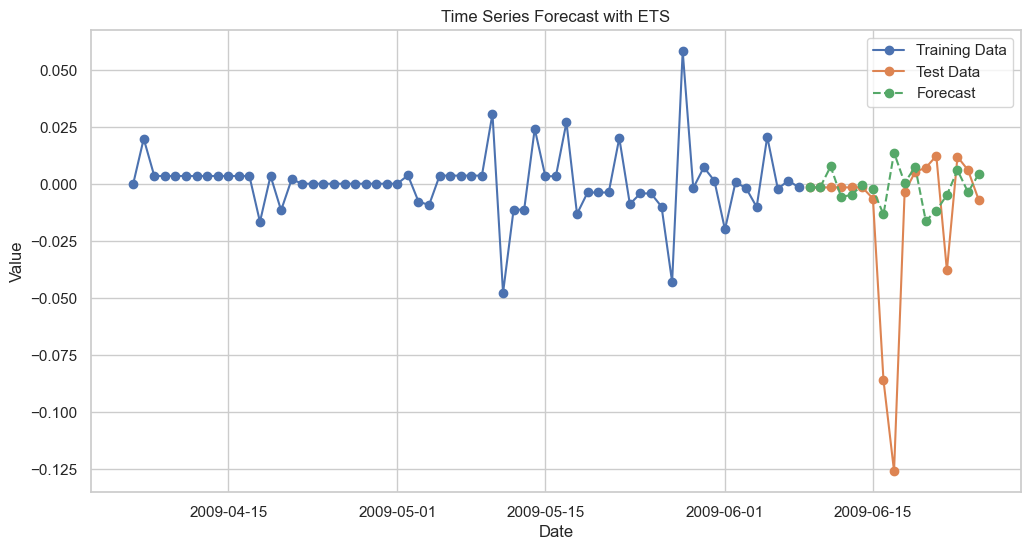

In [318]:
# creating a chart to visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Differenced_Sentiment'], label='Training Data', marker='o')
plt.plot(test_data.index, test_data['Differenced_Sentiment'], label='Test Data', marker='o')
plt.plot(test_data.index, forecast_values, label='Forecast', linestyle='--', marker='o')

plt.legend()
plt.title('Time Series Forecast with ETS')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [276]:
# fitting the ETS model to data
ets_model = sm.tsa.ExponentialSmoothing(merged_data['Differenced_Sentiment'], trend='add', seasonal='add', seasonal_periods=7)
ets_result = ets_model.fit()

# generating forecasts for the next 7 days
forecast_periods = 7
forecast_values = ets_result.forecast(steps=forecast_periods)

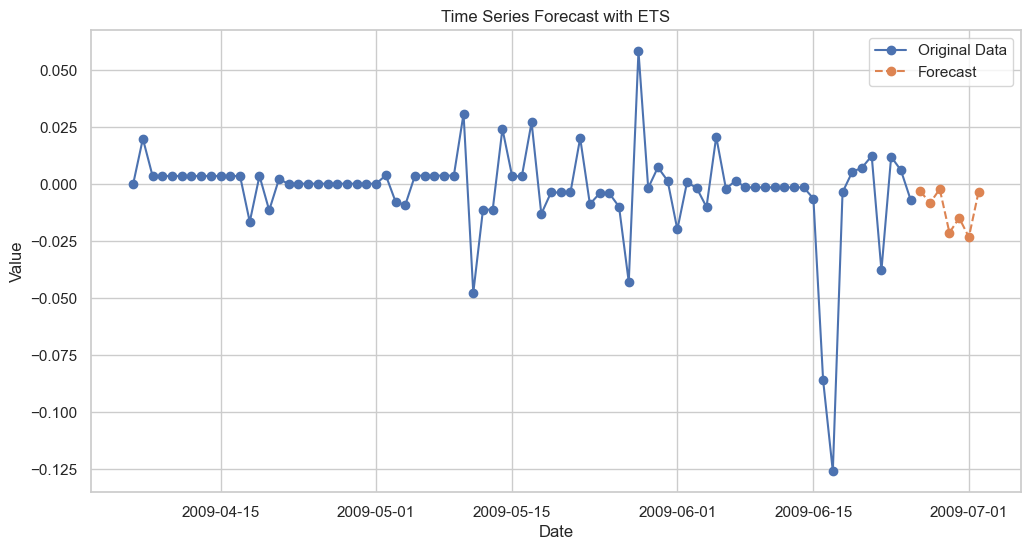

In [278]:
# plotting the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Differenced_Sentiment'], label='Original Data', marker='o')
plt.plot(forecast_values, label='Forecast', linestyle='--', marker='o')
plt.legend()
plt.title('7 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### 30 Days forecast

In [401]:
# fitting the ETS model to data
ets_model = sm.tsa.ExponentialSmoothing(merged_data['Differenced_Sentiment'], trend='add', seasonal='add', seasonal_periods=10)
ets_result = ets_model.fit()

# generating forecasts for the next 30 days
forecast_periods = 30
forecast_values = ets_result.forecast(steps=forecast_periods)

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


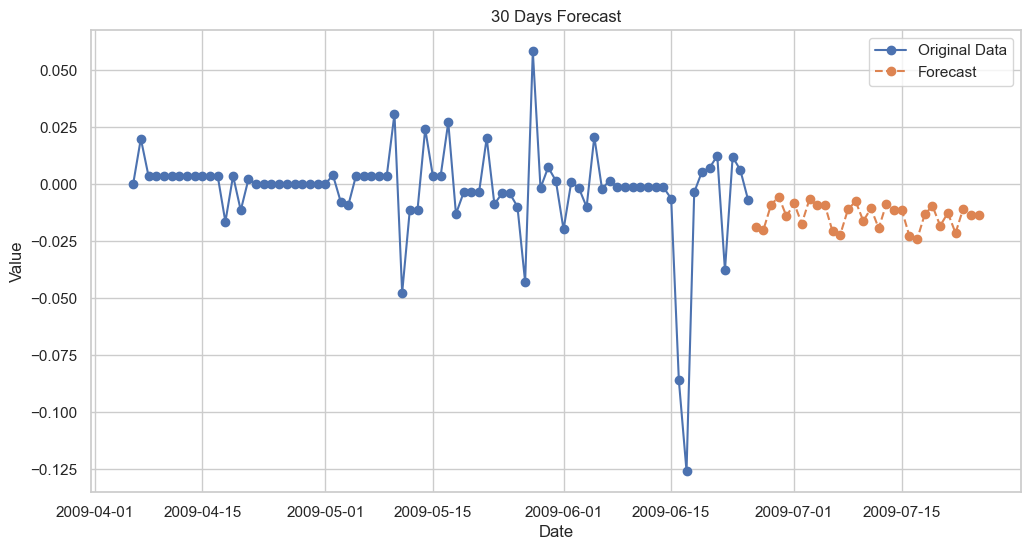

In [402]:
# plottinh the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Differenced_Sentiment'], label='Original Data', marker='o')
plt.plot(forecast_values, label='Forecast', linestyle='--', marker='o')
plt.legend()
plt.title('30 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

## 90 days forecast

In [308]:
# fitting the ETS model to data
ets_model = sm.tsa.ExponentialSmoothing(merged_data['Differenced_Sentiment'], trend='add', seasonal='add', seasonal_periods=20)
ets_result = ets_model.fit()

# generating forecasts for the next 90 days
forecast_periods = 90
forecast_values = ets_result.forecast(steps=forecast_periods)

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


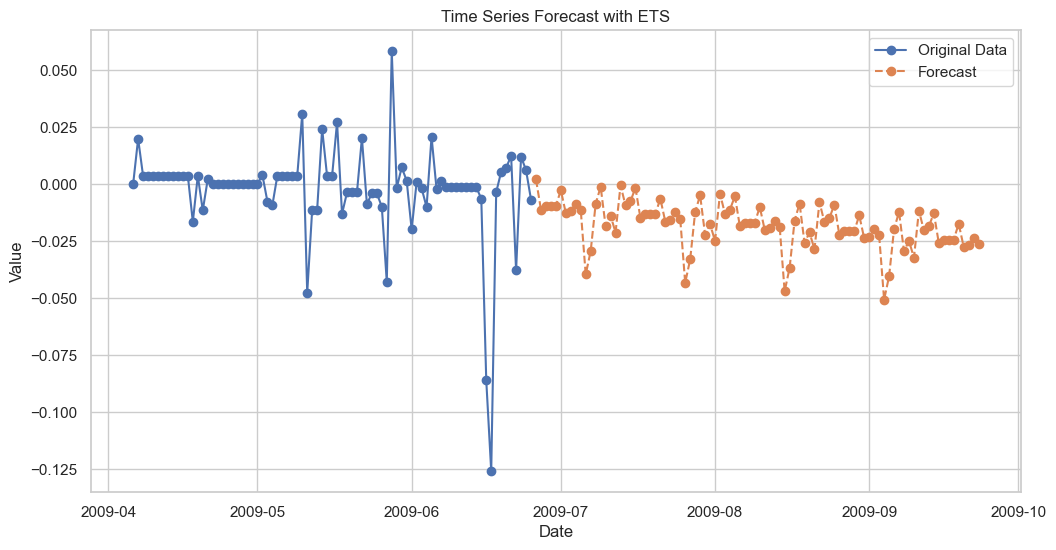

In [309]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Differenced_Sentiment'], label='Original Data', marker='o')
plt.plot(forecast_values, label='Forecast', linestyle='--', marker='o')
plt.legend()
plt.title('90 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# ARIMA

### Converting data into NonStationary

In [235]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(full_df['AverageSentimentScore'])

#stationarity
print('Dickey Fuller p-value: %F' % stationarity[1])

Dickey Fuller p-value: 0.909770


In [220]:
time_series = full_df['AverageSentimentScore']

# performming the ADF test
result = adfuller(time_series)

# extractting and print the results
adf_statistic, p_value, used_lag, nobs, critical_values, icbest = result

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Used Lag:", used_lag)
print("Number of Observations:", nobs)
print("Critical Values:", critical_values)
print("IC Best:", icbest)

# interpreting the results
if p_value <= 0.05:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is not stationary.")

ADF Statistic: -0.40196806081472425
p-value: 0.90976966272827
Used Lag: 1
Number of Observations: 79
Critical Values: {'1%': -3.5159766913976376, '5%': -2.898885703483903, '10%': -2.5866935058484217}
IC Best: -315.0355528760234
Fail to reject the null hypothesis: The data is not stationary.


In [242]:
# calculating differenced series
full_df['Differenced_Sentiment'] = full_df['AverageSentimentScore'].diff()

# backfill NaN values with zero or another suitable value
full_df['Differenced_Sentiment'].fillna(0, inplace=True)
print(full_df) 

            AverageSentimentScore  Differenced_Sentiment
Date                                                    
2009-04-06               0.140827               0.000000
2009-04-07               0.160714               0.019887
2009-04-08               0.164258               0.003544
2009-04-09               0.167803               0.003544
2009-04-10               0.171347               0.003544
...                           ...                    ...
2009-06-21              -0.026963               0.012355
2009-06-22              -0.064863              -0.037900
2009-06-23              -0.052896               0.011967
2009-06-24              -0.046778               0.006118
2009-06-25              -0.053605              -0.006827

[81 rows x 2 columns]


In [243]:
stationarity = adfuller(full_df['Differenced_Sentiment'])

#stationarity
print('Dickey Fuller p-value: %F' % stationarity[1])

Dickey Fuller p-value: 0.000000


### Predicting next 7 days

In [419]:
# splitting the data
train = full_df['AverageSentimentScore'].iloc[:-7] 
test = full_df['AverageSentimentScore'].iloc[-7:] 

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


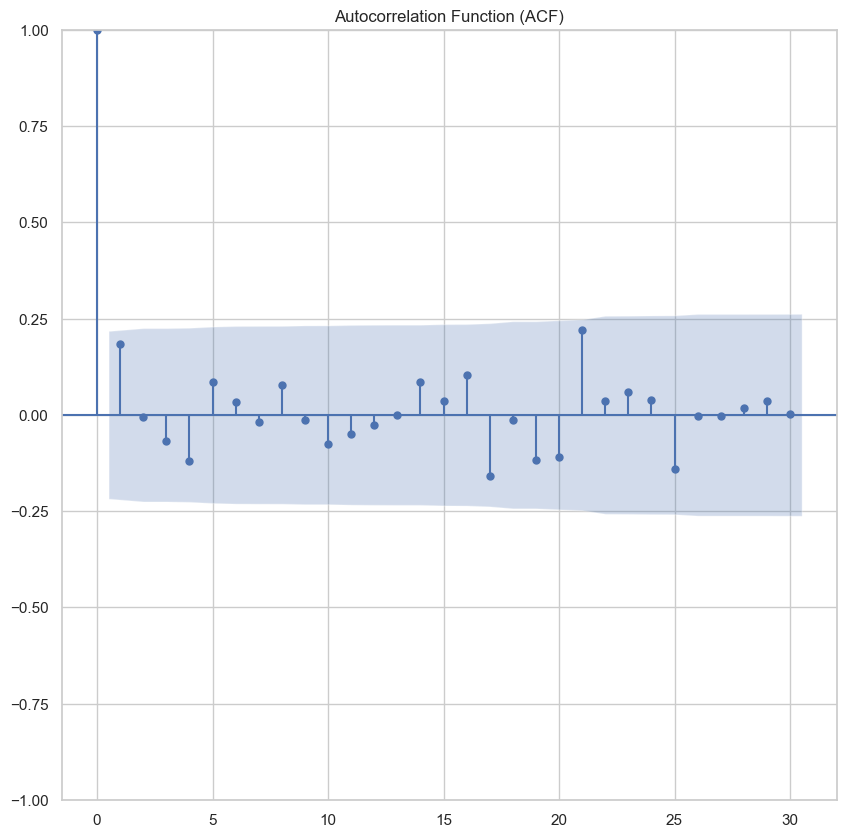

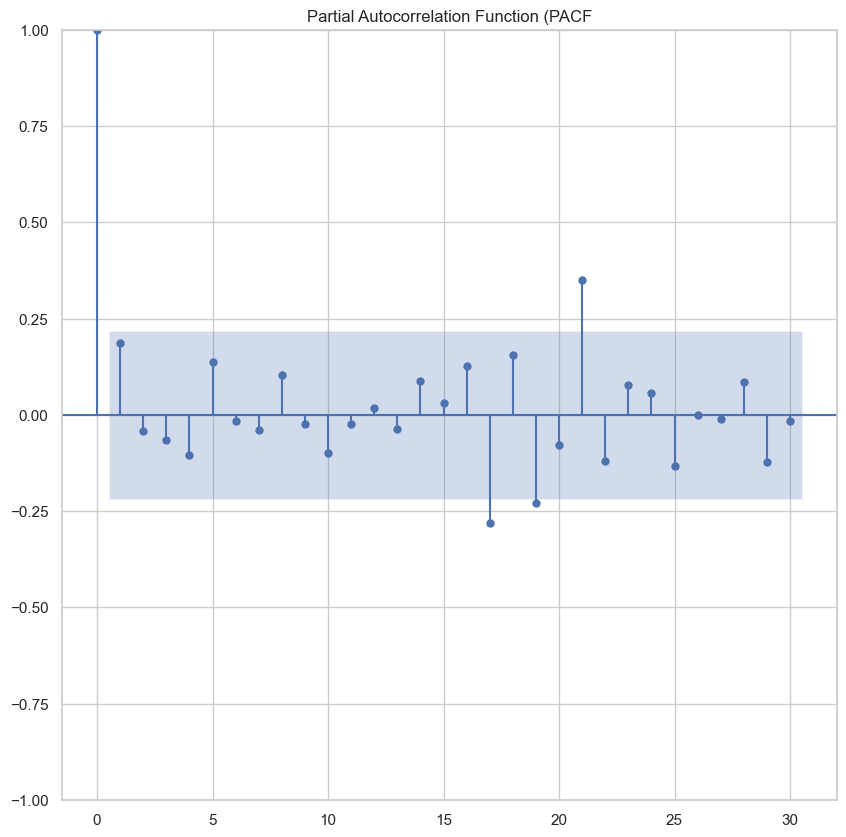

In [258]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# calculating ACF and PACF
acf_plot = plot_acf(full_df['Differenced_Sentiment'], lags=30)
plt.title('Autocorrelation Function (ACF)')

pacf_plot = plot_pacf(full_df['Differenced_Sentiment'], lags=30)
plt.title('Partial Autocorrelation Function (PACF')

plt.show()

In [247]:
import itertools
import statsmodels.api as sm

# defining the range of values for p, d, and q
p_values = range(0, 3) 
d_values = range(0, 2)  
q_values = range(0, 3)  

best_aic = float("inf")
best_params = (0, 0, 0)

# grid search to find the best parameters
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = sm.tsa.ARIMA(full_df['AverageSentimentScore'], order=(p, d, q))
        results = model.fit()

        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_params = (p, d, q)

    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters (p, d, q):", best_params)

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

Best AIC: -383.66158002925295
Best Parameters (p, d, q): (0, 1, 1)


C:\Users\ester\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [414]:
import statsmodels.api as sm

# defining and fitting the ARIMA model
model = sm.tsa.ARIMA(train, order=(0,1,1)) 
results = model.fit()

C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ester\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [415]:
# generating forecasts for the 7 days
forecast_values = results.forecast(steps=7)

# printing forecasted values
print("Forecasted Values:", forecast_values)

Forecasted Values: 2009-06-19   -0.046894
2009-06-20   -0.046894
2009-06-21   -0.046894
2009-06-22   -0.046894
2009-06-23   -0.046894
2009-06-24   -0.046894
2009-06-25   -0.046894
Freq: D, Name: predicted_mean, dtype: float64


# Rolling method

In [404]:
# converting the 'Date' column to datetime
daily_average_sentiment['Date'] = pd.to_datetime(daily_average_sentiment['Date'])

# finding the minimum and maximum dates in DataFrame
min_date = daily_average_sentiment['Date'].min()
max_date = daily_average_sentiment['Date'].max()

# creating a date range covering the entire range
date_range = pd.date_range(start=min_date, end=max_date)

# creating a new DataFrame with the date range
date_range_df = pd.DataFrame({'Date': date_range})

# merging the date range DataFrame with'daily_average_sentiment' DataFrame, filling missing dates
rolling = date_range_df.merge(daily_average_sentiment, on='Date', how='left')

# setting 'AverageSentimentScore' to NaN for missing dates
rolling['AverageSentimentScore'].fillna(float('nan'), inplace=True)

# sortting the merged DataFrame by date
rolling.sort_values('Date', inplace=True)

# resetting the index
rolling.reset_index(drop=True, inplace=True)
rolling.head()

,Date,AverageSentimentScore
0,2009-04-06,0.140827
1,2009-04-07,0.160714
2,2009-04-08,NaN
3,2009-04-09,NaN
4,2009-04-10,NaN


In [405]:
# linear interpolation for available values in reversed_df
rolling['AverageSentimentScore'] = rolling['AverageSentimentScore'].interpolate(method='linear')

In [406]:
# calculating the differenced series
rolling['Differenced_Sentiment'] = rolling['AverageSentimentScore'].diff()

# backfilling NaN values with zero or another suitable value
rolling['Differenced_Sentiment'].fillna(0, inplace=True)
print(rolling) 

         Date  AverageSentimentScore  Differenced_Sentiment
0  2009-04-06               0.140827               0.000000
1  2009-04-07               0.160714               0.019887
2  2009-04-08               0.164258               0.003544
3  2009-04-09               0.167803               0.003544
4  2009-04-10               0.171347               0.003544
..        ...                    ...                    ...
76 2009-06-21              -0.026963               0.012355
77 2009-06-22              -0.064863              -0.037900
78 2009-06-23              -0.052896               0.011967
79 2009-06-24              -0.046778               0.006118
80 2009-06-25              -0.053605              -0.006827

[81 rows x 3 columns]


In [407]:
rolling['Date'] = pd.to_datetime(rolling['Date'], format='%Y/%m/%d')
rolling = rolling.set_index('Date')
rolling = rolling.rename(columns={'Differenced_Sentiment': 'y'})

rolling = rolling.sort_index()
rolling.head()

,AverageSentimentScore,y
Date,,
2009-04-06,0.140827,0.000000
2009-04-07,0.160714,0.019887
2009-04-08,0.164258,0.003544
2009-04-09,0.167803,0.003544
2009-04-10,0.171347,0.003544


In [408]:
rolling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2009-04-06 to 2009-06-25
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AverageSentimentScore  81 non-null     float64
 1   y                      81 non-null     float64
dtypes: float64(2)
memory usage: 1.9 KB


In [409]:
(rolling.index == pd.date_range(start=rolling.index.min(),
                             end=rolling.index.max(),
                             freq=rolling.index.freq)).all()

True

Train dates : 2009-04-06 00:00:00 --- 2009-06-18 00:00:00  (n=74)
Test dates  : 2009-06-19 00:00:00 --- 2009-06-25 00:00:00  (n=7)


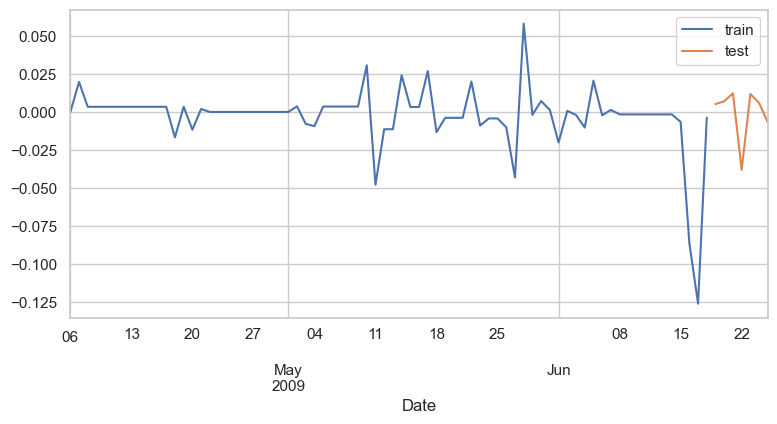

In [410]:
# splitting data into train-test
steps = 7
rolling_train = rolling[:-steps]
rolling_test  = rolling[-steps:]

print(f"Train dates : {rolling_train.index.min()} --- {rolling_train.index.max()}  (n={len(rolling_train)})")
print(f"Test dates  : {rolling_test.index.min()} --- {rolling_test.index.max()}  (n={len(rolling_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
rolling_train['y'].plot(ax=ax, label='train')
rolling_test['y'].plot(ax=ax, label='test')
ax.legend();

In [411]:
# creating and train forecaster
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 7
                )

forecaster.fit(y=rolling_train['y'])
forecaster

C:\Users\ester\AppData\Roaming\Python\Python39\site-packages\skforecast\utils\utils.py:788: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ester\AppData\Roaming\Python\Python39\site-packages\skforecast\utils\utils.py:788: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 73] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-01 22:42:33 
Last fit date: 2023-11-01 22:42:34 
Skforecast version: 0.10.1 
Python version: 3.9.12 
Forecaster id: None 

In [412]:
# predictions
steps = 7
predictions = forecaster.predict(steps=steps)
predictions.index = rolling_test.index
predictions.head(7)

C:\Users\ester\AppData\Roaming\Python\Python39\site-packages\skforecast\utils\utils.py:850: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


Date
2009-06-19   -0.004442
2009-06-20   -0.002307
2009-06-21   -0.000243
2009-06-22   -0.000224
2009-06-23    0.003382
2009-06-24   -0.001917
2009-06-25   -0.003970
Name: pred, dtype: float64

Roll_Mean Absolute Error (MAE): 0.01271837796727814
Roll_Mean Squared Error (MSE): 0.0002729289727089376
Roll_Root Mean Squared Error (RMSE): 0.016520562118431007
Roll_Mean Absolute Percentage Error (MAPE): 68.40029102435172


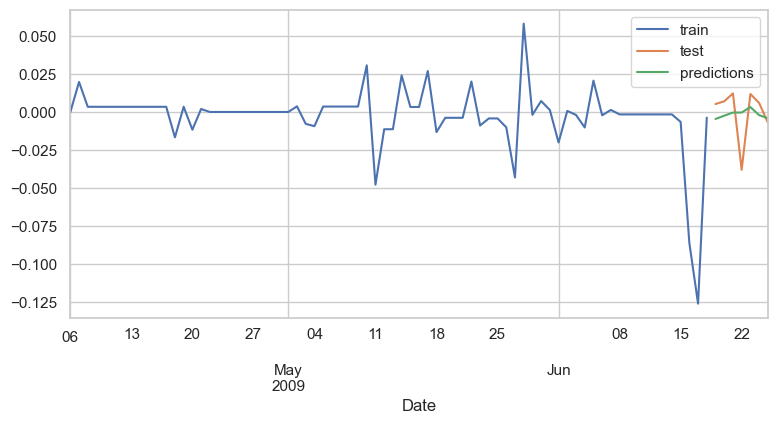

In [413]:
# plotting
fig, ax = plt.subplots(figsize=(9, 4))
rolling_train['y'].plot(ax=ax, label='train')
rolling_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();


# calculating forecast errors
errors = rolling_test['y'] - predictions

# calculating evaluation metrics
mae_R = mean_absolute_error(rolling_test['y'], predictions)
mse_R = mean_squared_error(rolling_test['y'], predictions)
rmse_R = np.sqrt(mse)
mape_R = (np.abs(errors) / rolling_test['y']).mean() * 100

# printing the error metrics
print("Roll_Mean Absolute Error (MAE):", mae_R)
print("Roll_Mean Squared Error (MSE):", mse_R)
print("Roll_Root Mean Squared Error (RMSE):", rmse_R)
print("Roll_Mean Absolute Percentage Error (MAPE):", mape_R)

In [389]:
# creating a DataFrame to store error results for Random forest model
error_R = pd.DataFrame({
    'Model': ['RandomForestRegressor'],
    'MAE': [mae_R],
    'MSE': [mse_R],
    'RMSE': [rmse_R],
    'MAPE': [mape_R]
})

In [391]:
error_df = pd.concat([error_ets, error_R], ignore_index=True)
error_df

,Model,MAE,MSE,RMSE,MAPE
0,ExponentialSmoothing,0.020455,0.001614,0.016521,153.555741
1,RandomForestRegressor,0.012718,0.000273,0.016521,68.400291


C:\Users\ester\AppData\Local\Temp\ipykernel_15772\1768096695.py:26: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=last_date, periods=forecast_periods + 1, closed='right')


            Forecast
2009-06-27 -0.002957
2009-06-28  0.000149
2009-06-29 -0.000500
2009-06-30 -0.000765
2009-07-01 -0.000797
2009-07-02 -0.002628


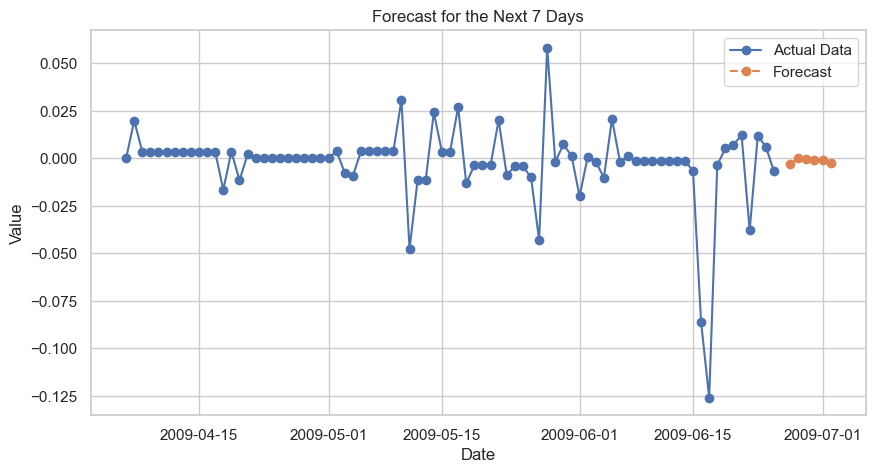

In [398]:
forecast_data = rolling.copy()

# setting the frequency of the DatetimeIndex
forecast_data.index.freq = 'D'

# setting the number of periods to forecast
forecast_periods = 7

# creating a RandomForestRegressor-based forecaster
forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=123),
    lags=7
)

# fitting the forecaster to data
forecaster.fit(y=forecast_data['y'])

# generating forecasts for the next 7 days
forecasts = forecaster.predict(steps=forecast_periods)

# getting the last date in the existing data
last_date = forecast_data.index[-1]

# creating a date range for the forecasted dates
forecast_dates = pd.date_range(start=last_date, periods=forecast_periods + 1, closed='right')

# creating a DataFrame for the forecasts
forecast_df = pd.DataFrame({'Forecast': forecasts}, index=forecast_dates[1:])

# printing the forecast
print(forecast_df)


# plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_data.index, forecast_data['y'], label='Actual Data', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--', marker='o')
plt.title('Forecast for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()